In [1]:
library(ggplot2)       ## for pretty plots generally
## ggplot customization:
theme_set(theme_bw())
options(repr.plot.width=20, repr.plot.height=8)
library(ggthemes)
#library(foreign)
library(nlme)
library(pscl); library(ggplot2)
#library(bbmle)
#library(coefplot2)
#library(glmmADMB)
library(ggplot2)
require(gridExtra)
#install.packages("extrafont")
#library(extrafont)
library(lme4)
#library(glmmADMB)
#library(MCMCglmm)
#library(blme)
library(MASS)          ## for glmmPQL
library(nlme)          ## for intervals(), tundra example
#library(coefplot2) ## coefficient plots
#library(reshape2)
library(plyr)
library(ggeffects)
require(ggplot2)
require(GGally)
#require(reshape2)
require(lme4)
require(compiler)
require(parallel)
require(boot)
require(lattice)
library(GGally)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'nlme' was built under R version 3.6.3"Warning message:
"package 'pscl' was built under R version 3.6.3"Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis
Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'lme4'

The following object is masked from 'package:nlme':

    lmList

Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'ggeffects' wa

In [2]:
data = read.csv('C:/Users/Falco/Desktop/directory/Humminbird_rescue/data/Treatment_model_data_subset.csv')

In [3]:
head(data)

Admitted,Place,Case_Year,Admitted.1,Found_on,Brought_in_after,City,County,Reason,Reason_edited,...,Steroid,treatment_e,admit_date,found_date,ID,r,Disposition_binary,F_Aid,month,season
1991-01-02,Lindsey,1991,1991-01-02,1991-01-02,0,Concord,Contra Costa County,,unknown,...,0,yes,1991-01-02,1991-01-02,2_ANHU,unknown,Released,Yes,1,Winter
1991-01-05,Lindsey,1991,1991-01-05,1991-01-01,4,Martinez,Contra Costa County,lethargic,unknown,...,0,yes,1991-01-05,1991-01-01,4_ANHU,unknown,Died,No,1,Winter
1991-02-05,Lindsey,1991,1991-02-05,1991-02-05,0,Martinez,Contra Costa County,possibly stunned- also possibly cat caught,caught by domestic animal,...,0,yes,1991-02-05,1991-02-05,18_ANHU,caught by domestic animal,Died,No,2,Winter
1991-03-19,Lindsey,1991,1991-03-19,1991-03-19,0,Pleasant Hill,Contra Costa County,flew into window,window hit,...,0,yes,1991-03-19,1991-03-19,35_ANHU,window hit,Died,No,3,Spring
1991-03-20,Lindsey,1991,1991-03-20,1991-03-20,0,Pleasant Hill,Contra Costa County,caught in building,found in the building,...,0,yes,1991-03-20,1991-03-20,36_ANHU,found inside,Died,No,3,Spring
1991-03-21,Lindsey,1991,1991-03-21,1991-03-21,0,Orinda,Contra Costa County,lying on ground,found on the ground,...,0,yes,1991-03-21,1991-03-21,38_ANHU,found on the ground,Died,No,3,Spring


In [4]:
table(data$season)


  Fall Spring Summer Winter 
   333   1763   1067    616 

In [5]:
table(data$Species)


ALHU ANHU BCHU COHU RUHU 
 233 3456   31    5   54 

In [6]:
table(data$G_O)


Non-selasphorus spp.     Selasphorus spp. 
                3492                  287 

data <- within(data, {
  Disposition_binary <- factor(Disposition_binary, levels = 0:1, labels = c("Released", "Died"))
    Place <- factor(Place)
    F_Aid <- factor(F_Aid, levels = 0:1, labels = c("No", "Yes"))
    Sex <- factor(Sex)
    Age <- factor(Age)
    season <- factor(season)
    Species <- factor(Species)
    
})

In [7]:
names(data)

[1] "Admitted"           "Place"              "Case_Year"         
 [4] "Admitted.1"         "Found_on"           "Brought_in_after"  
 [7] "City"               "County"             "Reason"            
[10] "Reason_edited"      "Reason_e"           "First_aid"         
[13] "Species"            "Species_e"          "Sex"               
[16] "Sex_e"              "Age"                "Age_e"             
[19] "G_O"                "Disposition"        "DDate"             
[22] "weight"             "BCS"                "attitude"          
[25] "dehydration"        "head"               "CNS"               
[28] "cardiopulmonary"    "GI"                 "musculoskeletal"   
[31] "integument"         "body"               "forelimb"          
[34] "forelimb_e"         "hindlimb"           "hindlimb_e"        
[37] "treatment"          "Heat"               "Fluids"            
[40] "NSAID"              "Antibiotic"         "Steroid"           
[43] "treatment_e"        "admit_date"         "found_date"        
[46] "ID"                 "r"                  "Disposition_binary"
[49] "F_Aid"              "month"              "season"

In [8]:
levels(data$Disposition_binary)

[1] "Died"     "Released"

In [9]:
table(data$Disposition_binary)


    Died Released 
    2152     1627 

In [10]:
data$Disposition<- ifelse(data$Disposition_binary == 'Died', 0, 1) 
table(data$Disposition)


   0    1 
2152 1627 

In [11]:
unique(data$r)

[1] unknown                   caught by domestic animal
[3] window hit                found inside             
[5] found on the ground       nest-related             
[7] suspect torpor-like state
7 Levels: caught by domestic animal found inside ... window hit

In [12]:
unique(data$Sex_e)

[1] Female-like  unknown      Male        
Levels: Female-like  Male unknown

In [13]:
data$Sex_e <- factor(data$Sex_e, levels = c("unknown", "Female-like ", "Male"))
str(data$Sex_e)

 Factor w/ 3 levels "unknown","Female-like ",..: 2 2 2 2 2 2 2 2 2 2 ...


In [14]:
data$r <- factor(data$r, levels = c("unknown", "caught by domestic animal", "window hit", "found inside",  "found on the ground", "nest-related", "suspect torpor-like state"))
str(data$r)

 Factor w/ 7 levels "unknown","caught by domestic animal",..: 1 1 2 3 4 5 5 6 5 5 ...


In [15]:
data$r = relevel(data$r, ref=1)

In [16]:
str(data$r)

 Factor w/ 7 levels "unknown","caught by domestic animal",..: 1 1 2 3 4 5 5 6 5 5 ...


In [17]:
#data$Sex_e = relevel(data$Sex_e, ref=2)
#str(data$Sex_e)

In [18]:
table(data$r)


                  unknown caught by domestic animal                window hit 
                      248                       520                       409 
             found inside       found on the ground              nest-related 
                      140                      1799                       575 
suspect torpor-like state 
                       88 

## GlmmTMB

In [19]:
library(glmmTMB)
library(oddsratio)
library(sjPlot)

Warning message:
"package 'glmmTMB' was built under R version 3.6.3"Warning message:
"package 'oddsratio' was built under R version 3.6.3"Warning message:
"package 'sjPlot' was built under R version 3.6.3"

In [20]:
m4_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
            (1|G_O)+ (1 | Sex_e), family="binomial", data)

model_inter_season_ref2 <- glmmTMB(Disposition_binary ~ Age_e +  
                + season + r +Age_e*season +(1|G_O)+ (1 | Sex_e), 
                family="binomial", data)

Warning message in fitTMB(TMBStruc):
"Model convergence problem; non-positive-definite Hessian matrix. See vignette('troubleshooting')"

In [21]:
anova(m4_ref2, model_inter_season_ref2)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m4_ref2,13,4700.925,4782.009,-2337.462,4674.925,NA,NA,NA
model_inter_season_ref2,16,NA,NA,NA,NA,NA,3,NA


Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 23 rows containing missing values (geom_point)."

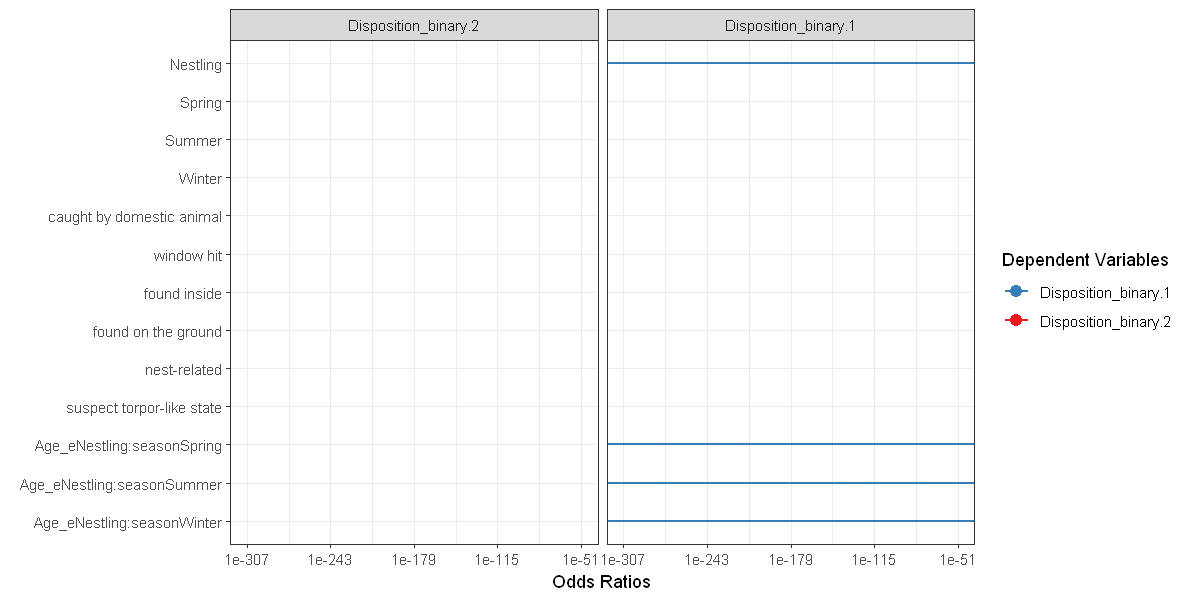

In [22]:
options(repr.plot.width=10, repr.plot.height=5)
plot_models(model_inter_season_ref2, m4_ref2,  grid = TRUE)

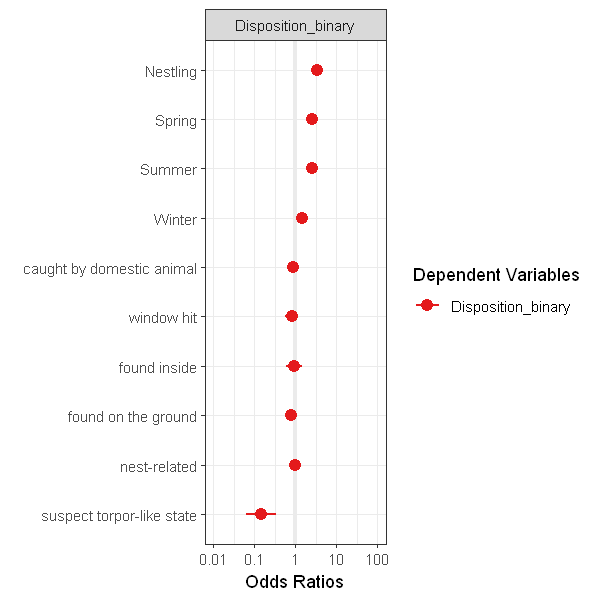

In [23]:
options(repr.plot.width=5, repr.plot.height=5)
plot_models(m4_ref2,  grid = TRUE)

In [24]:
tab_model(m4_ref2, model_inter_season_ref2)

In [25]:
m5_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
                   Heat+ (1|G_O)+ (1 | Sex_e), family="binomial", data)
m6_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
                   Heat + Fluids + (1|G_O)+ (1 | Sex_e), family="binomial", data)
m7_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
                   Heat + Fluids + Steroid +(1|G_O)+ (1 | Sex_e), family="binomial", data)
m8_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
                   Heat + Fluids + Steroid + +NSAID + (1|G_O)+ (1 | Sex_e), family="binomial", data)


In [20]:
m9_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
                   Heat + Fluids + Steroid + NSAID + Antibiotic+ (1|G_O)+ (1 | Sex_e), family="binomial", data)

In [21]:
table(data$r)


                  unknown caught by domestic animal                window hit 
                      248                       520                       409 
             found inside       found on the ground              nest-related 
                      140                      1799                       575 
suspect torpor-like state 
                       88 

In [22]:
length(unique(data$ID))

[1] 3779

In [23]:
anova(m4_ref2, m5_ref2, m6_ref2, m7_ref2, m8_ref2, m9_ref2)

ERROR: Error in anova(m4_ref2, m5_ref2, m6_ref2, m7_ref2, m8_ref2, m9_ref2): object 'm4_ref2' not found


In [30]:
tab_model(m4_ref2, m5_ref2, m6_ref2, m7_ref2, m8_ref2, m9_ref2)

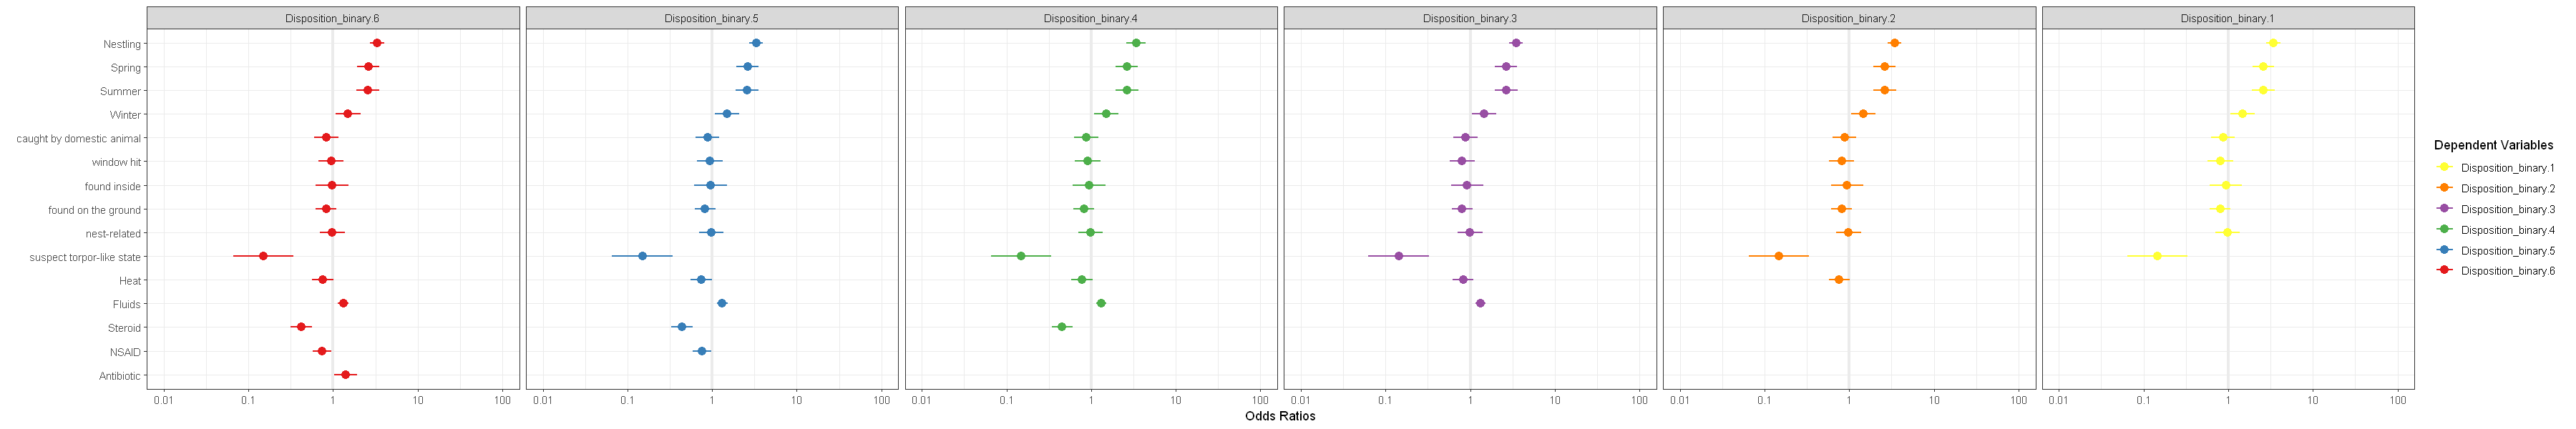

In [31]:
options(repr.plot.width=30, repr.plot.height=5)
plot_models(m4_ref2, m5_ref2, m6_ref2, m7_ref2, m8_ref2, m9_ref2,  grid = TRUE)

In [24]:
tab_model(m9_ref2)

In [25]:
m9_ref2_inter <- glmmTMB(Disposition_binary ~ Age_e + season +  r +
                   Heat + Fluids + Steroid + NSAID + Antibiotic+ Age_e*season+ (1|G_O)+ (1 | Sex_e), family="binomial", data)

Warning message in fitTMB(TMBStruc):
"Model convergence problem; singular convergence (7). See vignette('troubleshooting')"

In [26]:
anova(m9_ref2_inter, m9_ref2)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m9_ref2,18,4649.608,4761.877,-2306.804,4613.608,NA,NA,NA
m9_ref2_inter,21,4650.340,4781.321,-2304.170,4608.340,5.267754,3,0.1532085


Warning message:
"package 'DHARMa' was built under R version 3.6.3"This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details


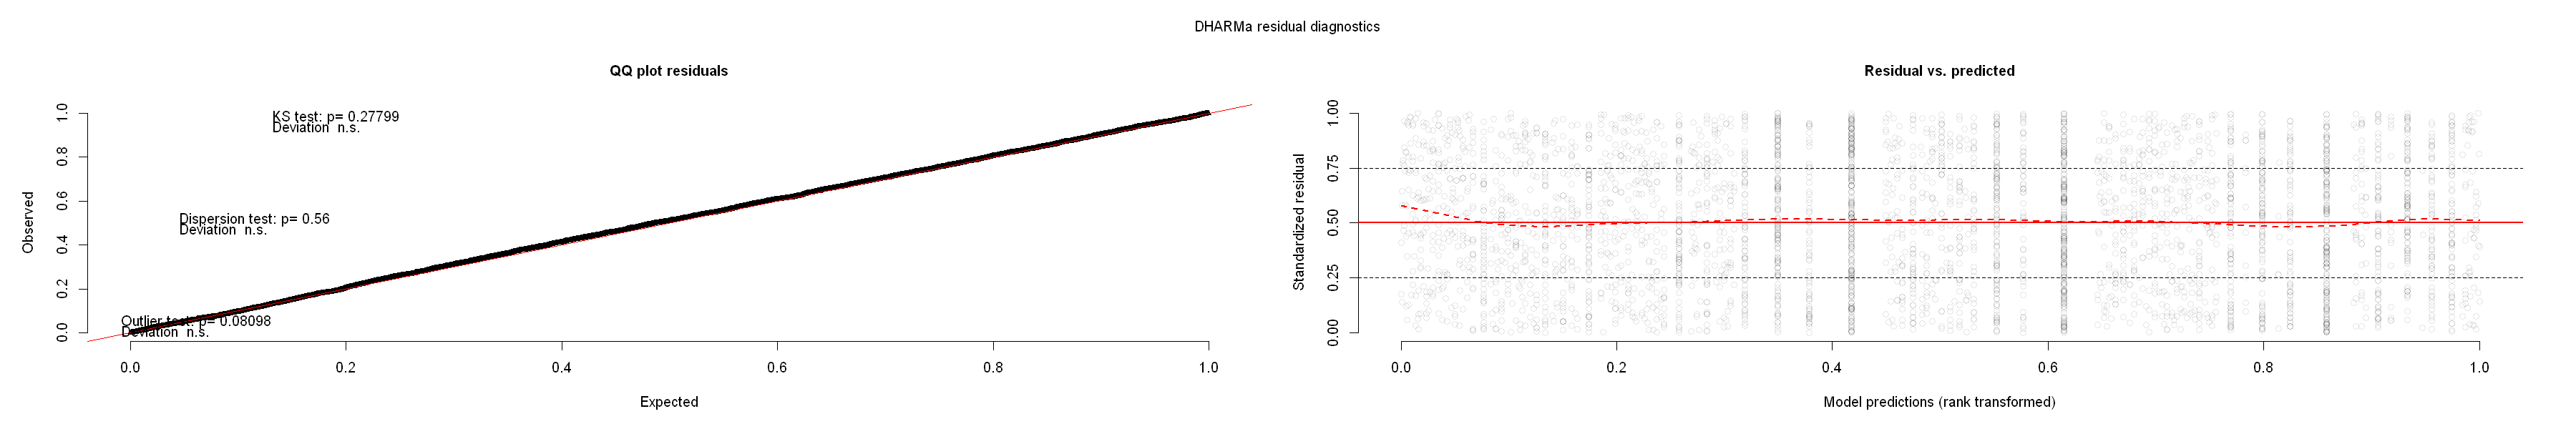

In [35]:
library(DHARMa)
m9_ref2_simres <- simulateResiduals(m9_ref2)
plot(m9_ref2_simres)

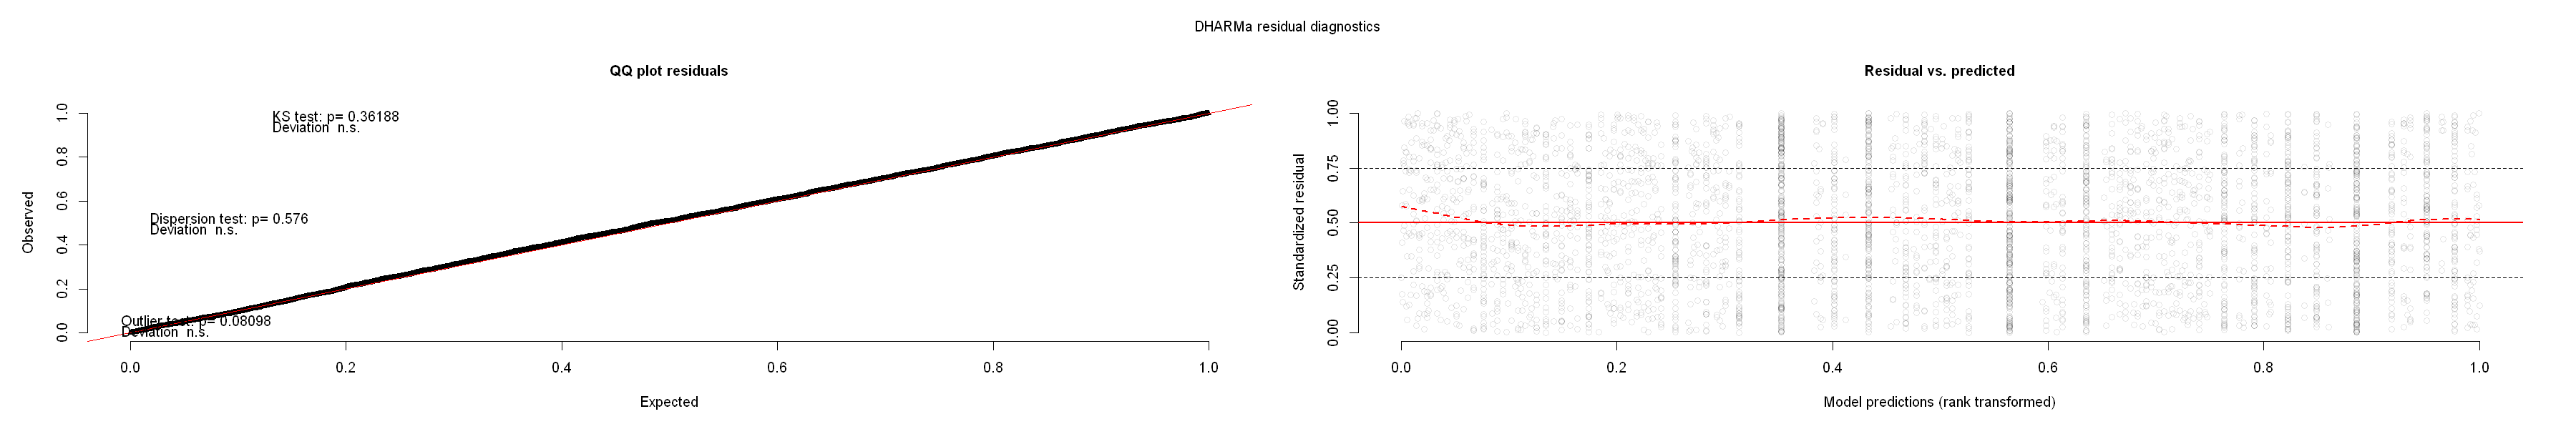

In [36]:
m9_ref2_inter_simres <- simulateResiduals(m9_ref2_inter)
plot(m9_ref2_inter_simres)

In [27]:
summary(m9_ref2)

 Family: binomial  ( logit )
Formula:          
Disposition_binary ~ Age_e + season + r + Heat + Fluids + Steroid +  
    NSAID + Antibiotic + (1 | G_O) + (1 | Sex_e)
Data: data

     AIC      BIC   logLik deviance df.resid 
  4649.6   4761.9  -2306.8   4613.6     3761 

Random effects:

Conditional model:
 Groups Name        Variance  Std.Dev. 
 G_O    (Intercept) 1.734e-02 1.317e-01
 Sex_e  (Intercept) 5.131e-09 7.163e-05
Number of obs: 3779, groups:  G_O, 2; Sex_e, 3

Conditional model:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.14235    0.26765  -4.268 1.97e-05 ***
Age_eNestling               1.20217    0.09685  12.413  < 2e-16 ***
seasonSpring                0.96044    0.15293   6.280 3.38e-10 ***
seasonSummer                0.95197    0.15839   6.010 1.85e-09 ***
seasonWinter                0.40873    0.16950   2.411 0.015895 *  
rcaught by domestic animal -0.18994    0.16831  -1.129 0.259091    
rwindow hit                -0

In [28]:
summary(m9_ref2_inter)

 Family: binomial  ( logit )
Formula:          
Disposition_binary ~ Age_e + season + r + Heat + Fluids + Steroid +  
    NSAID + Antibiotic + Age_e * season + (1 | G_O) + (1 | Sex_e)
Data: data

     AIC      BIC   logLik deviance df.resid 
  4650.3   4781.3  -2304.2   4608.3     3758 

Random effects:

Conditional model:
 Groups Name        Variance  Std.Dev. 
 G_O    (Intercept) 1.515e-02 1.231e-01
 Sex_e  (Intercept) 2.551e-26 1.597e-13
Number of obs: 3779, groups:  G_O, 2; Sex_e, 3

Conditional model:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.13071    0.26621  -4.247 2.16e-05 ***
Age_eNestling               -13.39220 1716.86068  -0.008 0.993776    
seasonSpring                  0.90684    0.15489   5.855 4.78e-09 ***
seasonSummer                  1.01367    0.16241   6.241 4.34e-10 ***
seasonWinter                  0.40103    0.17378   2.308 0.021016 *  
rcaught by domestic animal   -0.19154    0.16864  -1.136 0.256042   

In [60]:
tab_model(m9_ref2)

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 31 rows containing missing values (geom_point)."

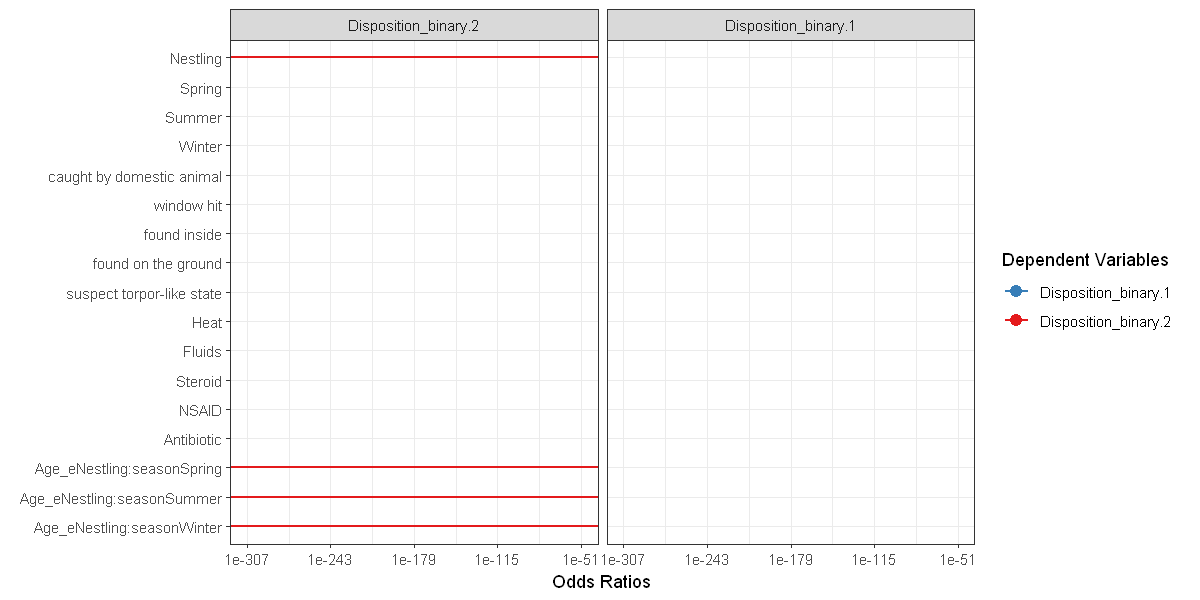

In [52]:
options(repr.plot.width=10, repr.plot.height=5)
plot_models(m9_ref2,  m9_ref2_inter, grid = TRUE)

### predictions 

In [29]:
simo=simulate(m9_ref2, nsim = 10000)
dim(simo)

[1]  3779 10000

In [30]:
library(dplyr)
df = data %>% 
    select(Age_e, season, r, Heat, Fluids, Steroid, NSAID, Antibiotic, G_O, Sex_e)


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:MASS':

    select

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:nlme':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [31]:
head(df)

Age_e,season,r,Heat,Fluids,Steroid,NSAID,Antibiotic,G_O,Sex_e
adult-like,Winter,unknown,1,0,0,0,0,Non-selasphorus spp.,Female-like
adult-like,Winter,unknown,1,1,0,0,0,Non-selasphorus spp.,Female-like
adult-like,Winter,caught by domestic animal,1,0,0,0,0,Non-selasphorus spp.,Female-like
adult-like,Spring,window hit,1,1,0,0,0,Non-selasphorus spp.,Female-like
adult-like,Spring,found inside,1,0,0,0,0,Non-selasphorus spp.,Female-like
adult-like,Spring,found on the ground,1,1,0,0,0,Non-selasphorus spp.,Female-like


In [32]:
df$predicted_disposition = predict(m9_ref2, newdata = df, type = 'response')

In [33]:
write.csv(df, 'C:/Users/Falco/Desktop/directory/Humminbird_rescue/Outputs/Simulation_treatment_subset_final.csv')

## Generalized mixed model Random effect  = Species and age

In [17]:
m1 <- glmer(Disposition_binary ~ Sex_e +  
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [18]:
m2 <- glmer(Disposition_binary ~ Sex_e +  
                season +
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [19]:
m3 <- glmer(Disposition_binary ~ Sex_e +  
                season + r +
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [20]:
m4 <- glmer(Disposition_binary ~ Sex_e +  
                season + r + Heat + 
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [21]:
m5 <- glmer(Disposition_binary ~ Sex_e +  
                season + r + Heat + Fluids + 
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [22]:
m6 <- glmer(Disposition_binary ~ Sex_e +  
                season + r + Heat + Fluids + Steroid +
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [23]:
m7 <- glmer(Disposition_binary ~ Sex_e +  
                season + r + Heat + Fluids + Steroid +NSAID +
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [19]:
m8 <- glmer(Disposition_binary ~ Sex_e +  
                season + r + Heat + Fluids + Steroid +NSAID +Antibiotic+
                (1|G_O)+(1|Age_e) , 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

In [25]:
m9 <- glmer(Disposition_binary ~ Sex_e +  Age_e+
                season + r + Heat + Fluids + Steroid +NSAID +Antibiotic+
                (1|G_O)+(1|Age_e) , 
                family="binomial", data)

boundary (singular) fit: see ?isSingular



In [20]:
AIC(m1,m2,m3,m4,m5,m6,m7,m8, m9)

ERROR: Error in AIC(m1, m2, m3, m4, m5, m6, m7, m8, m9): object 'm1' not found


In [47]:
anova(m1,m2,m3,m4,m5,m6,m7,m8,m9)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1,5,4799.124,4830.310,-2394.562,4789.124,NA,NA,NA
m2,8,4733.032,4782.929,-2358.516,4717.032,72.092461,3,1.520931e-15
m3,14,4709.949,4797.270,-2340.974,4681.949,35.082870,6,4.153074e-06
m4,15,4708.505,4802.063,-2339.253,4678.505,3.443704,1,6.349319e-02
m5,16,4694.079,4793.875,-2331.040,4662.079,16.426004,1,5.058648e-05
m6,17,4662.727,4768.760,-2314.363,4628.727,33.352234,1,7.688945e-09
m7,18,4661.408,4773.678,-2312.704,4625.408,3.318652,1,6.849799e-02
m8,19,4658.613,4777.120,-2310.307,4620.613,4.794957,1,2.854317e-02
m9,20,4647.640,4772.385,-2303.820,4607.640,12.972806,1,3.160480e-04


In [21]:
print (summary(m8),correlation=TRUE)
se <- sqrt(diag(vcov(m8)))
# table of estimates with 95% CI
(tab <- cbind(Est = fixef(m8), LL = fixef(m8) - 1.96 * se, UL = fixef(m8) + 1.96 *
    se))
## Odds
print (exp(tab))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Disposition_binary ~ Sex_e + season + r + Heat + Fluids + Steroid +  
    NSAID + Antibiotic + (1 | G_O) + (1 | Age_e)
   Data: data
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  4658.6   4777.1  -2310.3   4620.6     3760 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0752 -0.7737 -0.4795  0.8715  4.2796 

Random effects:
 Groups Name        Variance Std.Dev.
 G_O    (Intercept) 0.04741  0.2177  
 Age_e  (Intercept) 0.65665  0.8103  
Number of obs: 3779, groups:  G_O, 2; Age_e, 2

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.77567    1.29368  -0.600   0.5488    
Sex_eFemale-like            0.41903    2.23529   0.187   0.8513    
Sex_eMale                   0.25218    2.23705   0.113   0.9102    
seasonSpring                0.


Correlation of fixed effects could have been required in summary()




Correlation of Fixed Effects:
            (Intr) Sx_Fm- Sex_Ml ssnSpr ssnSmm ssnWnt rcgbda rwndwh rfndin
Sex_eFml-lk -0.867                                                        
Sex_eMale   -0.866  0.999                                                 
seasonSprng -0.130  0.026  0.028                                          
seasonSummr -0.095 -0.009 -0.007  0.859                                   
seasonWintr -0.081 -0.009 -0.009  0.780  0.751                            
rcghtbydmsa -0.094  0.014  0.017  0.047  0.022  0.059                     
rwindow hit -0.083  0.008  0.009  0.052  0.058  0.014  0.616              
rfoundinsid -0.071  0.010  0.011  0.041  0.038  0.019  0.480  0.471       
rfndonthgrn -0.122  0.034  0.035  0.013  0.006  0.015  0.749  0.714  0.555
rnestrelatd -0.056 -0.034 -0.033 -0.009  0.006 -0.005  0.603  0.554  0.435
rsspctrpr-s -0.036  0.006  0.005  0.007  0.009  0.003  0.261  0.255  0.197
Heat        -0.111  0.009  0.007 -0.041 -0.052 -0.032 -0.045 -0.061 -

,Est,LL,UL
(Intercept),-0.77566772,-3.31127189,1.759936448
Sex_eFemale-like,0.41903311,-3.96214037,4.800206580
Sex_eMale,0.25218482,-4.13243308,4.636802727
seasonSpring,0.95658966,0.65661388,1.256565441
seasonSummer,0.94910303,0.63860579,1.259600271
seasonWinter,0.40636354,0.07411233,0.738614745
rcaught by domestic animal,-0.20357623,-0.53397257,0.126820110
rwindow hit,-0.06040998,-0.40928553,0.288465576
rfound inside,-0.04410527,-0.49091209,0.402701547
rfound on the ground,-0.19119566,-0.47447209,0.092080759


                                 Est         LL          UL
(Intercept)                0.4603963 0.03646976   5.8120680
Sex_eFemale-like           1.5204907 0.01902236 121.5355217
Sex_eMale                  1.2868339 0.01604380 103.2138167
seasonSpring               2.6028049 1.92825198   3.5133340
seasonSummer               2.5833914 1.89383862   3.5240126
seasonWinter               1.5013482 1.07692777   2.0930341
rcaught by domestic animal 0.8158080 0.58627134   1.1352128
rwindow hit                0.9413785 0.66412457   1.3343784
rfound inside              0.9568532 0.61206788   1.4958604
rfound on the ground       0.8259710 0.62221344   1.0964534
rnest related              0.9815153 0.70200949   1.3723067
rsuspect torpor-like state 0.1519647 0.06673676   0.3460354
Heat                       0.7587930 0.56531685   1.0184852
Fluids                     1.3291265 1.15293216   1.5322473
Steroid                    0.4203805 0.31512837   0.5607865
NSAID                      0.7641427 0.5

In [22]:
write.csv(exp(tab), 'C:/Users/Falco/Desktop/directory/Humminbird_rescue/Outputs/glmer_Treatment_subset.csv')

In [23]:
simo=simulate(m8, nsim = 10000)
dim(simo)

[1]  3779 10000

In [25]:
head(simo)
library(dplyr)
simo2 <- mutate_all(simo, function(x) as.numeric(x)-1)


Attaching package: 'dplyr'


The following object is masked from 'package:GGally':

    nasa


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:nlme':

    collapse


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [26]:
head(simo2)

,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,sim_7,sim_8,sim_9,sim_10,⋯,sim_9991,sim_9992,sim_9993,sim_9994,sim_9995,sim_9996,sim_9997,sim_9998,sim_9999,sim_10000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,1,1,0,0,0,0,⋯,1,1,0,1,0,1,0,0,1,0
2,1,0,1,0,0,0,0,1,1,0,⋯,1,1,0,0,0,1,0,1,1,0
3,1,0,0,1,0,1,1,0,1,1,⋯,1,0,1,1,0,1,0,1,1,0
4,1,0,0,1,0,1,1,1,0,1,⋯,1,0,1,1,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,⋯,1,1,0,1,0,0,1,0,1,0
6,0,1,0,0,0,0,0,0,1,1,⋯,1,0,1,1,0,0,0,0,1,0


In [29]:
ranef(m8)

$G_O
                     (Intercept)
Non-selasphorus spp.   0.1464491
Selasphorus spp.      -0.1464298

$Age_e
           (Intercept)
adult-like  -0.7924532
Nestling     0.7927207

with conditional variances for "G_O" "Age_e" 

In [30]:
rr = data.frame(ranef(m8))
rr

grpvar,term,grp,condval,condsd
<chr>,<fct>,<fct>,<dbl>,<dbl>
G_O,(Intercept),Non-selasphorus spp.,0.1464491,0.1594268
G_O,(Intercept),Selasphorus spp.,-0.1464298,0.1620360
Age_e,(Intercept),adult-like,-0.7924532,0.1613834
Age_e,(Intercept),Nestling,0.7927207,0.1691419


Warning message:
"Ignoring unknown aesthetics: show.legend"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


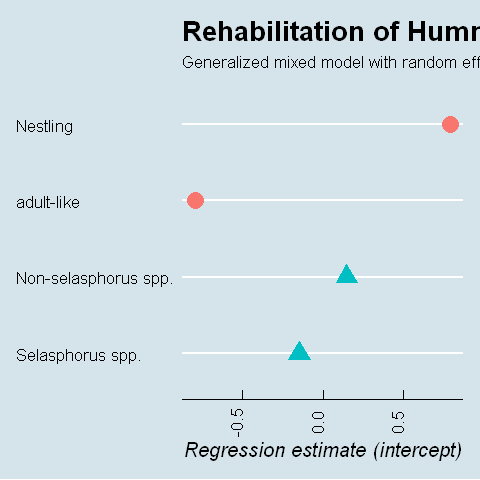

In [31]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(rr, aes(x = condval, y = grp, colour = grpvar, shape = grpvar)) +
    geom_point(aes(size = 12,show.legend=FALSE)) + theme_economist()+
    labs(y = NULL,
         x = "Regression estimate (intercept)",
         title = "Rehabilitation of Hummingbirds",
         subtitle = "Generalized mixed model with random effect")+
    theme(axis.title = element_text(size = 12, face = "italic"),
          axis.text.x=element_text(angle=90),
          legend.text=element_text(size=9, face = "bold.italic"),
          legend.position="none",
          legend.title=element_blank(),
          plot.title = element_text(size=16,family="Times New Roman"))

In [32]:
co = data.frame(exp(tab))
co$model <- rep('generalized linear mixed-effects model',nrow(co))
co

,Est,LL,UL,model
,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),0.4603963,0.03646976,5.8120680,generalized linear mixed-effects model
Sex_eFemale-like,1.5204907,0.01902236,121.5355217,generalized linear mixed-effects model
Sex_eMale,1.2868339,0.01604380,103.2138167,generalized linear mixed-effects model
seasonSpring,2.6028049,1.92825198,3.5133340,generalized linear mixed-effects model
seasonSummer,2.5833914,1.89383862,3.5240126,generalized linear mixed-effects model
seasonWinter,1.5013482,1.07692777,2.0930341,generalized linear mixed-effects model
rcaught by domestic animal,0.8158080,0.58627134,1.1352128,generalized linear mixed-effects model
rwindow hit,0.9413785,0.66412457,1.3343784,generalized linear mixed-effects model
rfound inside,0.9568532,0.61206788,1.4958604,generalized linear mixed-effects model


Saving 6.67 x 6.67 in image



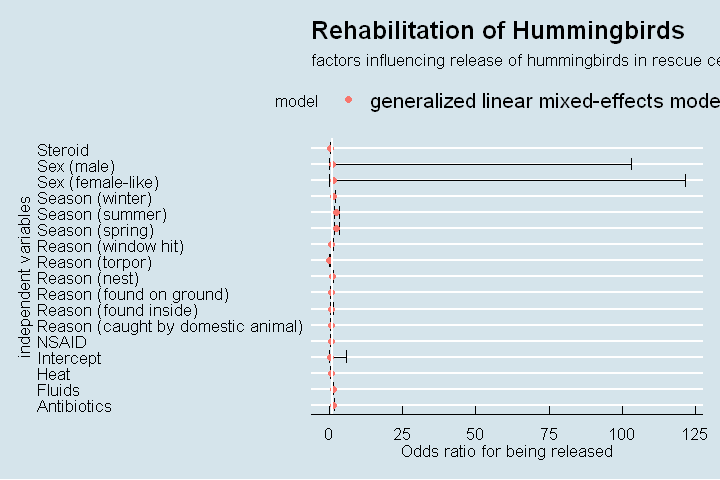

In [33]:
co = data.frame(exp(tab))
co$model <- rep('generalized linear mixed-effects model',nrow(co))
co$variables <- c('Intercept', 'Sex (female-like)', 'Sex (male)', 'Season (spring)', 'Season (summer)', 'Season (winter)',
                  'Reason (caught by domestic animal)','Reason (window hit)', 'Reason (found inside)','Reason (found on ground)', 'Reason (nest)', 
                  'Reason (torpor)', 'Heat', 'Fluids', 'Steroid','NSAID', 'Antibiotics')
options(repr.plot.width=6, repr.plot.height=4)
ggplot(co, aes(y = Est, x = variables, colour = model, shape = model))+
    geom_errorbar(aes(ymin=LL, ymax=UL), colour="black", width=.8,)+
    geom_point() + theme_economist()+coord_flip()+
    labs(x = 'independent variables',
         y = "Odds ratio for being released",
         title = "Rehabilitation of Hummingbirds",
         subtitle = "factors influencing release of hummingbirds in rescue centers")+
    geom_hline(yintercept=1,  color = "white", size=0.8)#linetype="dashed",
ggsave('C:/Users/Falco/Desktop/directory/Humminbird_rescue/Outputs/Odds_ratios_subset.png', 
       plot = last_plot(), dpi = 300)

Saving 6.67 x 6.67 in image



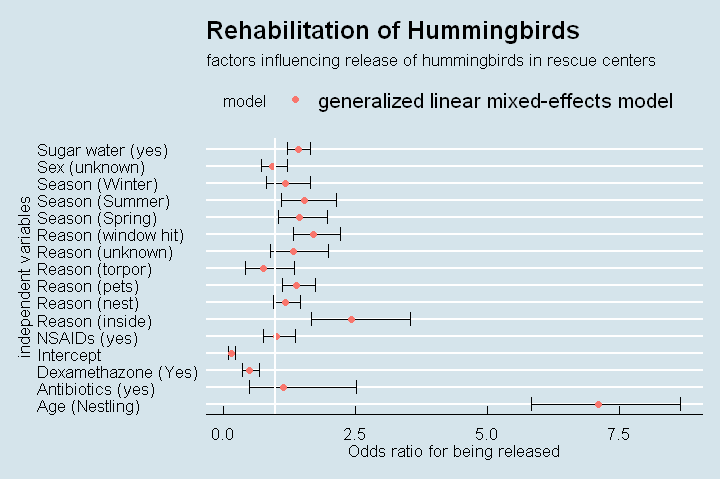

In [21]:
co = data.frame(exp(tab))
co$model <- rep('generalized linear mixed-effects model',nrow(co))
co$variables <- c('Intercept', 'Sex (unknown)', 'Age (Nestling)',
                  'Season (Spring)', 'Season (Summer)', 'Season (Winter)',
                  'Reason (inside)', 'Reason (nest)', 'Reason (pets)', 'Reason (torpor)',
                  'Reason (unknown)' ,'Reason (window hit)',
                  'Fluids (yes)', 'Sugar water (yes)',
                  'Dexamethazone (Yes)',
                  'NSAIDs (yes)', 'Antibiotics (yes)')
co = subset(co, variables!= 'Fluids (yes)' )
options(repr.plot.width=6, repr.plot.height=4)
ggplot(co, aes(y = Est, x = variables, colour = model, shape = model))+
    geom_errorbar(aes(ymin=LL, ymax=UL), colour="black", width=.8,)+
    geom_point() + theme_economist()+coord_flip()+
    labs(x = 'independent variables',
         y = "Odds ratio for being released",
         title = "Rehabilitation of Hummingbirds",
         subtitle = "factors influencing release of hummingbirds in rescue centers")+
    geom_hline(yintercept=1,  color = "white", size=0.8)#linetype="dashed",
ggsave('C:/Users/Falco/Desktop/directory/Humminbird_rescue/Outputs/Odds_ratios_presentation_subset.png', 
       plot = last_plot(), dpi = 300)

## model without Treatment

In [24]:
model2 <- glmer(Disposition_binary ~ Sex_e +  
                Age_e + season + r +
                (1|G_O), 
                family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

print (summary(model2))
se <- sqrt(diag(vcov(model2)))
# table of estimates with 95% CI
(tab <- cbind(Est = fixef(model2), LL = fixef(model2) - 1.96 * se, UL = fixef(model2) + 1.96 *
    se))
## Odds
print (exp(tab))

boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Disposition_binary ~ Sex_e + Age_e + season + r + (1 | G_O)
   Data: data

     AIC      BIC   logLik deviance df.resid 
  4297.5   4378.3  -2135.7   4271.5     3700 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7349 -0.6010 -0.4416  0.7297  2.8341 

Random effects:
 Groups Name        Variance Std.Dev.
 G_O    (Intercept) 0        0       
Number of obs: 3713, groups:  G_O, 3

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.68527    0.18639  -9.042  < 2e-16 ***
Sex_eunknown  -0.11662    0.13376  -0.872  0.38327    
Age_eNestling  1.99547    0.09964  20.026  < 2e-16 ***
seasonSpring   0.35735    0.16267   2.197  0.02804 *  
seasonSummer   0.43667    0.16766   2.604  0.00920 ** 
seasonWinter   0.16712    0.17610   0.949  0.34263    
rinside        0.92025    0.19102   4.817 1.45e-06 ***
rnest        

,Est,LL,UL
(Intercept),-1.6852743,-2.05058980,-1.3199587
Sex_eunknown,-0.1166231,-0.37879165,0.1455454
Age_eNestling,1.9954723,1.80017465,2.1907700
seasonSpring,0.3573464,0.03851796,0.6761748
seasonSummer,0.4366665,0.10804485,0.7652881
seasonWinter,0.1671214,-0.17804444,0.5122871
rinside,0.9202466,0.54583969,1.2946535
rnest,0.1614641,-0.05287804,0.3758063
rpets,0.3468423,0.12743684,0.5662477
rtorpor,-0.2815355,-0.85148787,0.2884170


                    Est        LL        UL
(Intercept)   0.1853936 0.1286590 0.2671463
Sex_eunknown  0.8899205 0.6846882 1.1566703
Age_eNestling 7.3556764 6.0507041 8.9420956
seasonSpring  1.4295309 1.0392694 1.9663417
seasonSummer  1.5475399 1.1140977 2.1496137
seasonWinter  1.1818977 0.8369052 1.6691043
rinside       2.5099093 1.7260571 3.6497313
rnest         1.1752303 0.9484957 1.4561651
rpets         1.4145936 1.1359131 1.7616444
rtorpor       0.7546242 0.4267795 1.3343135
runknown      1.3263401 0.8973392 1.9604383
rwindow hit   1.6026980 1.2442972 2.0643306


In [25]:
AIC(model2, model1)

,df,AIC
,<dbl>,<dbl>
model2,13,4297.482
model1,18,4266.051


In [26]:
anova(model2, model1)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model2,13,4297.482,4378.337,-2135.741,4271.482,NA,NA,NA
model1,18,4266.051,4378.004,-2115.026,4230.051,41.43135,5,7.676452e-08
